- 데이터의 결측치 및 이상치 확인
	- 데이터에 결측치가 있는지 확인하고 처리하라.
	- 데이터에 이상치가 있는지 확인하고 처리하라.
- 시각화를 통한 탐색
	- 사용자별/영화별 평점 분포를 히스토그램, 박스 플롯 등으로 시각화하라. (Histogram)

In [1432]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import MultipleLocator
import pandas as pd

plt.rcParams['font.family'] = 'D2coding'
plt.rcParams['font.size'] = 9
plt.rcParams['axes.unicode_minus'] = False

from kmr_dataset import get_paths

In [1433]:
path = get_paths(size='small')[3]
df_movies = pd.read_csv(path, sep='\t')

rows_with_missing = df_movies[df_movies.isnull().any(axis=1)]
print(rows_with_missing)

movie_null = df_movies.isnull().sum()
print(movie_null)
print()
print(f'전체 영화: {len(df_movies)}')
print(f'결측치 제외: {len(df_movies.dropna())}')

     movie   title                 title_eng  year     grade
9    10010   슈퍼맨 3       Superman III , 1983   NaN    전체 관람가
30   10031    죠스 3           Jaws 3-D , 1983   NaN   15세 관람가
31   10032    죠스 4  Jaws: The Revenge , 1987   NaN     PG-13
50   10051   싸이코 2          Psycho II , 1983   NaN  청소년 관람불가
51   10052   싸이코 3         Psycho III , 1986   NaN  청소년 관람불가
..     ...     ...                       ...   ...       ...
992  10993     톰 혼           Tom Horn , 1980   NaN         R
994  10995  공포의 여정  Journey Into Fear , 1975   NaN        PG
995  10996  버스틴 루즈      Bustin' Loose , 1981   NaN         R
996  10997   블랙 엔젤          Mausoleum , 1983   NaN  청소년 관람불가
998  10999  프랑켄슈타인       Frankenstein , 1931   NaN        NR

[400 rows x 5 columns]
movie          0
title          7
title_eng      8
year         390
grade         42
dtype: int64

전체 영화: 999
결측치 제외: 599


In [1434]:
path = get_paths(size='small')[0]
df_castings = pd.read_csv(path, sep=',')

print(f'전체 영화: {len(df_castings)}')
print(f'결측치 제외: {len(df_castings.dropna())}')

전체 영화: 9776
결측치 제외: 9776


In [1435]:
path = get_paths(size='small')[1]
df_countries = pd.read_csv(path, sep=',')

print(f'전체 영화: {len(df_countries)}')
print(f'결측치 제외: {len(df_countries.dropna())}')

전체 영화: 1109
결측치 제외: 1109


In [1436]:
path = get_paths(size='small')[2]
df_genres = pd.read_csv(path, sep=',')

print(f'전체 영화: {len(df_genres)}')
print(f'결측치 제외: {len(df_genres.dropna())}')

전체 영화: 2025
결측치 제외: 2025


In [1437]:
path = get_paths(size='small')[4]
df_people = pd.read_csv(path, sep='\t')

print(f'전체 영화: {len(df_people)}')
print(f'결측치 제외: {len(df_people.dropna())}')

print()

rows_with_missing = df_people[df_people.isnull().any(axis=1)]
print(rows_with_missing)

전체 영화: 7172
결측치 제외: 6305

      people korean original
243      636     황점      NaN
254      659     전준      NaN
389      970     황빈      NaN
659     1672    강리나      NaN
661     1675    강문영      NaN
...      ...    ...      ...
7157  353351    공소야      NaN
7161  372529    이정은      NaN
7167  390433    김형진      NaN
7168  398299    이정진      NaN
7171  420466    김미란      NaN

[867 rows x 3 columns]


In [1438]:
path = get_paths(size='small')[5]
df_rates = pd.read_csv(path, sep=',')

print(f'전체 영화: {len(df_rates)}')
print(f'결측치 제외: {len(df_rates.dropna())}')

전체 영화: 140710
결측치 제외: 140710


In [1439]:
#  이상치
valid_years = (df_movies['year'] < 1900) | (df_movies['year'] > 2024)

df_cleaned = df_movies[valid_years]
print(df_cleaned)

Empty DataFrame
Columns: [movie, title, title_eng, year, grade]
Index: []


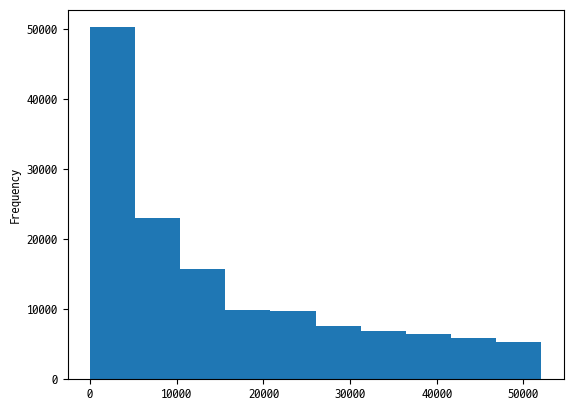

In [1440]:
df_rates['user'].plot(kind='hist')
plt.show()

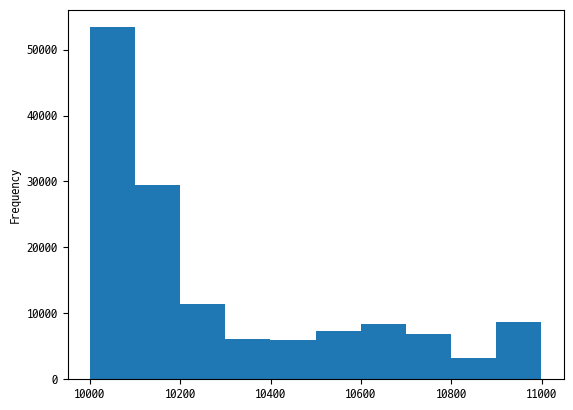

In [1441]:
df_rates['movie'].plot(kind='hist')
plt.show()

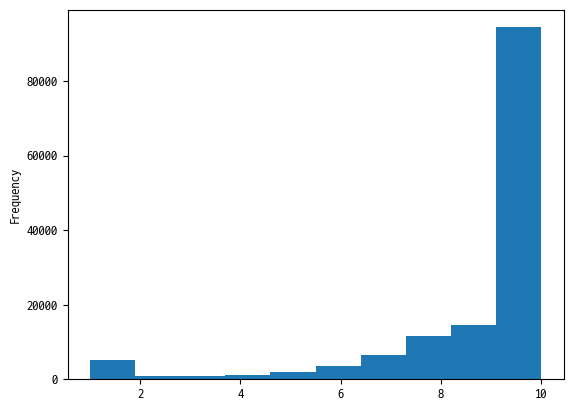

In [1442]:
df_rates['rate'].plot(kind='hist')
plt.show()

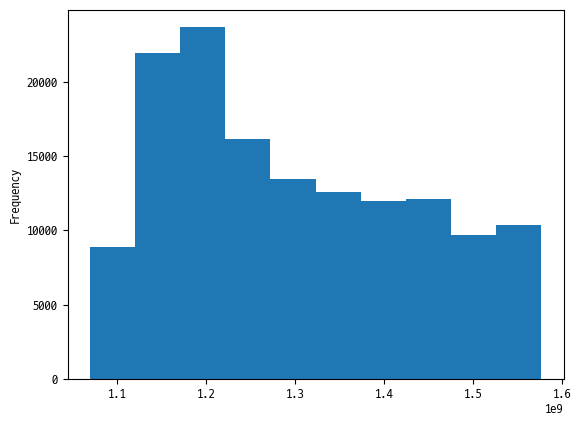

In [1443]:
df_rates['time'].plot(kind='hist')
plt.show()

/tmp/ipykernel_363965/3676260917.py:3: FutureWarning: 'm' is deprecated and will be removed in a future version, please use 'M' instead.
  tmp['time'] = pd.to_datetime(tmp['time']).dt.to_period('m')


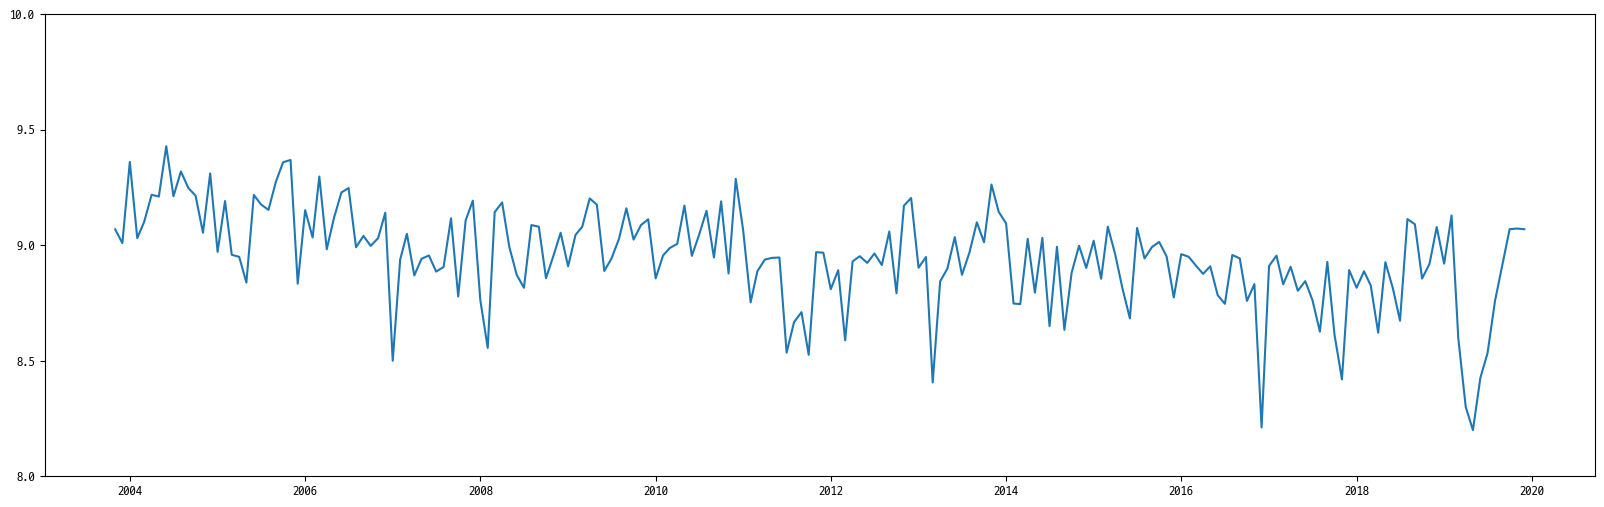

In [1444]:
tmp = df_rates.copy()
tmp['time'] = pd.to_datetime(df_rates['time'], unit='s')
tmp['time'] = pd.to_datetime(tmp['time']).dt.to_period('m')

tmp = tmp.groupby('time').agg({'rate': 'mean'}).reset_index()
tmp['time'] = tmp['time'].dt.to_timestamp()

plt.figure(figsize=(20, 6))
plt.plot(tmp['time'], tmp['rate'])
plt.ylim(8, 10)
plt.gca().yaxis.set_major_locator(MultipleLocator(0.5))

plt.show()

In [1445]:
from scipy.stats import zscore

df_rates['z_score'] = zscore(df_rates['rate'])
df_rates = df_rates[(df_rates['z_score'] < 3) & (df_rates['z_score'] > -3)].reset_index(drop=True)

/tmp/ipykernel_363965/2804036142.py:3: FutureWarning: 'm' is deprecated and will be removed in a future version, please use 'M' instead.
  tmp['time'] = pd.to_datetime(tmp['time']).dt.to_period('m')


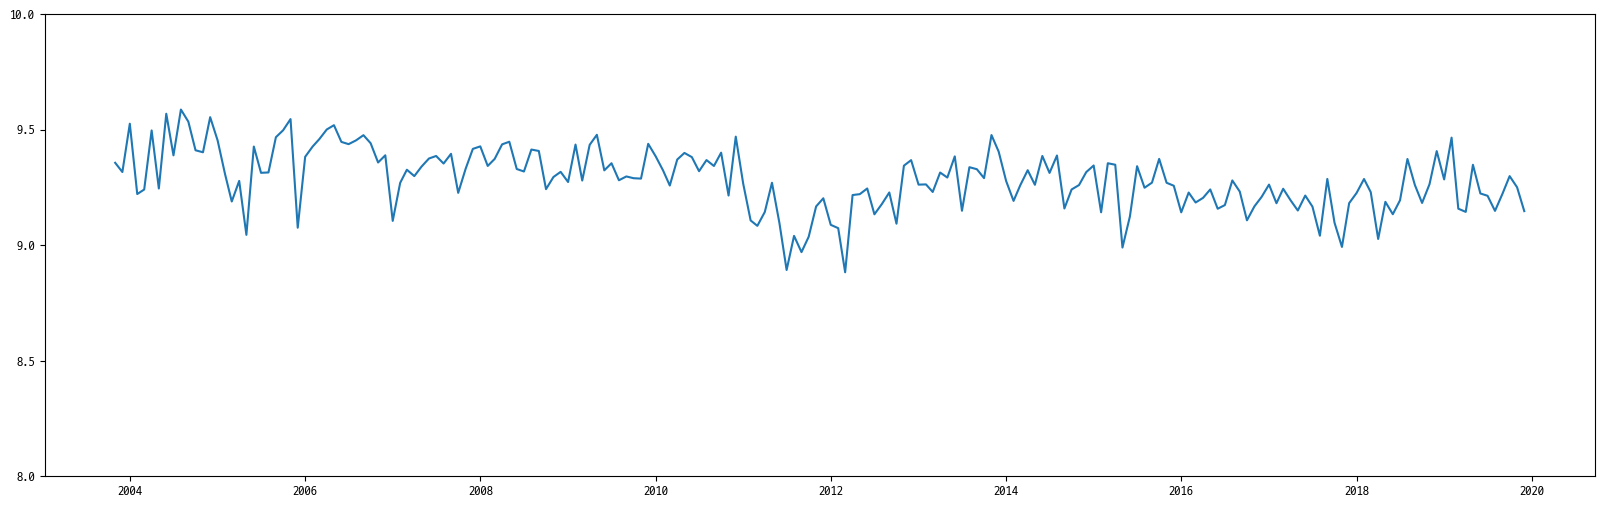

In [1446]:
tmp = df_rates.copy()
tmp['time'] = pd.to_datetime(df_rates['time'], unit='s')
tmp['time'] = pd.to_datetime(tmp['time']).dt.to_period('m')

tmp = tmp.groupby('time').agg({'rate': 'mean'}).reset_index()
tmp['time'] = tmp['time'].dt.to_timestamp()

plt.figure(figsize=(20, 6))
plt.plot(tmp['time'], tmp['rate'])
plt.ylim(8, 10)
plt.gca().yaxis.set_major_locator(MultipleLocator(.5))

plt.show()

In [1454]:
from scipy.stats import zscore
import pandas as pd

# 데이터 읽기
path = get_paths(size='small')[5]
df_rates = pd.read_csv(path, sep=',')

df_movie_rates = df_rates.groupby('movie').agg({'rate': 'mean', 'user': 'count'}).reset_index()

df_movie_rates['z_score'] = zscore(df_movie_rates['user'])

df_movie_rates = df_movie_rates[df_movie_rates['z_score'] > -3].reset_index(drop=True)

df_movie_rates = df_movie_rates.drop(columns=['z_score'])

df_movie_rates = pd.merge(df_movie_rates, df_movies[['movie', 'title', 'title_eng', 'year']], on='movie')

df_movie_rates.head(30)


,movie,rate,user,title,title_eng,year
0,10001,9.294360,3635,시네마 천국,"Cinema Paradiso , 1988",2013.0
1,10002,9.416778,3004,빽 투 더 퓨쳐,"Back To The Future , 1985",2015.0
2,10003,9.270981,989,빽 투 더 퓨쳐 2,"Back To The Future Part 2 , 1989",2015.0
3,10004,9.120000,700,빽 투 더 퓨쳐 3,"Back To The Future Part III , 1990",1990.0
4,10005,9.048619,905,스타워즈 에피소드 4 - 새로운 희망,"Star Wars , 1977",1997.0
5,10006,9.115127,747,스타워즈 에피소드 5 - 제국의 역습,"Star Wars Episode V: The Empire Strikes Back ,...",1997.0
6,10007,9.034335,699,스타워즈 에피소드 6 - 제다이의 귀환,"Star Wars: Episode VI: Return Of The Jedi , 1983",1997.0
7,10008,8.805785,242,슈퍼맨,"Superman , 1978",1979.0
8,10009,8.462185,119,슈퍼맨 2,"Superman II , 1980",1981.0
9,10011,5.250000,76,슈퍼맨 4 - 최강의 적,"Superman IV: The Quest For Peace , 1987",1990.0
